In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
import xgboost as xgb
import numpy as np

In [3]:
cleanedData = pd.read_csv('cleaned_realestate.csv')

In [4]:
cleanedData = cleanedData.drop(columns='Id')

### Splitting Dataset

In [11]:
y = cleanedData['SalePrice']
X = cleanedData.drop(columns=['SalePrice'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

### Linear Regression

In [13]:
linear_regr = linear_model.LinearRegression()

In [14]:
linear_regr.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred = linear_regr.predict(X_test)
LR_RMSE = mean_squared_error(y_test,y_pred,squared=False)
LR_RS = r2_score(y_test, y_pred)

In [83]:
print('RMSE: ' + str(LR_RMSE))
print('R2: ' + str(LR_RS))

RMSE: 38841.90946859053
R2: 0.777425705457231


### Lasso

In [27]:
lasso_regr = linear_model.Lasso(alpha=0.05)
lasso_regr.fit(X_train,y_train)

C:\Users\54208\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237964419286.3822, tolerance: 650296976.6251712
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.05)

In [84]:
y_pred_lasso = lasso_regr.predict(X_test)
Lasso_RMSE = mean_squared_error(y_test,y_pred_lasso,squared=False)
Lasso_RS = r2_score(y_test, y_pred_lasso)

In [85]:
print('RMSE: ' + str(Lasso_RMSE))
print('R2: ' + str(Lasso_RS))

RMSE: 38967.488077823575
R2: 0.7759841824313602


### Decision Tree

In [30]:
dt_regr = DecisionTreeRegressor()
dt_regr.fit(X_train,y_train)

DecisionTreeRegressor()

In [86]:
y_pred_dt = dt_regr.predict(X_test)
DT_RMSE = mean_squared_error(y_test,y_pred_dt,squared=False)
DT_RS = r2_score(y_test, y_pred_dt)

In [87]:
print('RMSE: ' + str(DT_RMSE))
print('R2: ' + str(DT_RS))

RMSE: 40700.74437261651
R2: 0.7556127376930778


### Random Forest

In [35]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
y_pred_rf = rf_regr.predict(X_test)
RF_RMSE = mean_squared_error(y_test,y_pred_rf,squared=False)
RF_RS = r2_score(y_test, y_pred_rf)

In [89]:
print('RMSE: ' + str(RF_RMSE))
print('R2: ' + str(RF_RS))

RMSE: 35297.5493413509
R2: 0.8161926092036471


### Ridge

In [97]:
ridge_regr = Ridge(alpha=.5)
ridge_regr.fit(X_train,y_train)

Ridge(alpha=0.5)

In [101]:
y_pred_ridge = ridge_regr.predict(X_test)
Ridge_RMSE = mean_squared_error(y_test,y_pred_ridge,squared=False)
Ridge_RS = r2_score(y_test, y_pred_ridge)

In [102]:
print('RMSE: ' + str(Ridge_RMSE))
print('R2: ' + str(Ridge_RS))

RMSE: 38405.897150410005
R2: 0.7823945885420002


### Ridge CV

In [42]:
n_iterations = 1000
lambda_list = np.logspace(-3, 5, n_iterations)
alphas =  lambda_list
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.alpha_)

0.3392583382740992


In [94]:
ridge_cv_regr = Ridge(alpha=ridge_cv.alpha_)
ridge_cv_regr.fit(X_train,y_train)

Ridge(alpha=0.3392583382740992)

In [98]:
y_pred_ridge_cv = ridge_cv_regr.predict(X_test)
Ridge_cv_RMSE = mean_squared_error(y_test,y_pred_ridge_cv,squared=False)
Ridge_cv_RS = r2_score(y_test, y_pred_ridge_cv)

In [99]:
print('RMSE: ' + str(Ridge_cv_RMSE))
print('R2: ' + str(Ridge_cv_RS))

RMSE: 38404.875160231706
R2: 0.7824061694527884


### XG Boost

In [59]:
XG_regr = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10)
XG_regr.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
y_pred_XG = XG_regr.predict(X_test)
XG_RMSE = mean_squared_error(y_test,y_pred_XG,squared=False)
XG_RS = r2_score(y_test, y_pred_XG)

In [93]:
print('RMSE: ' + str(XG_RMSE))
print('R2: ' + str(XG_RS))

RMSE: 34220.42736274319
R2: 0.8272393934911813


### Visualizing Model Results

In [103]:
model_list = ['Linear Regression','Lasso','Decision Tree','Random Forest','Ridge','Ridge CV','XG Boost']
RMSE_list = [LR_RMSE,Lasso_RMSE,DT_RMSE,RF_RMSE,Ridge_RMSE,Ridge_cv_RMSE,XG_RMSE]

In [104]:
dict = {'Model':model_list, 'RMSE':RMSE_list}
df = pd.DataFrame(dict)

In [109]:
df = df.set_index('Model')

In [113]:
df['RMSE'] = df['RMSE'].round(decimals=2)

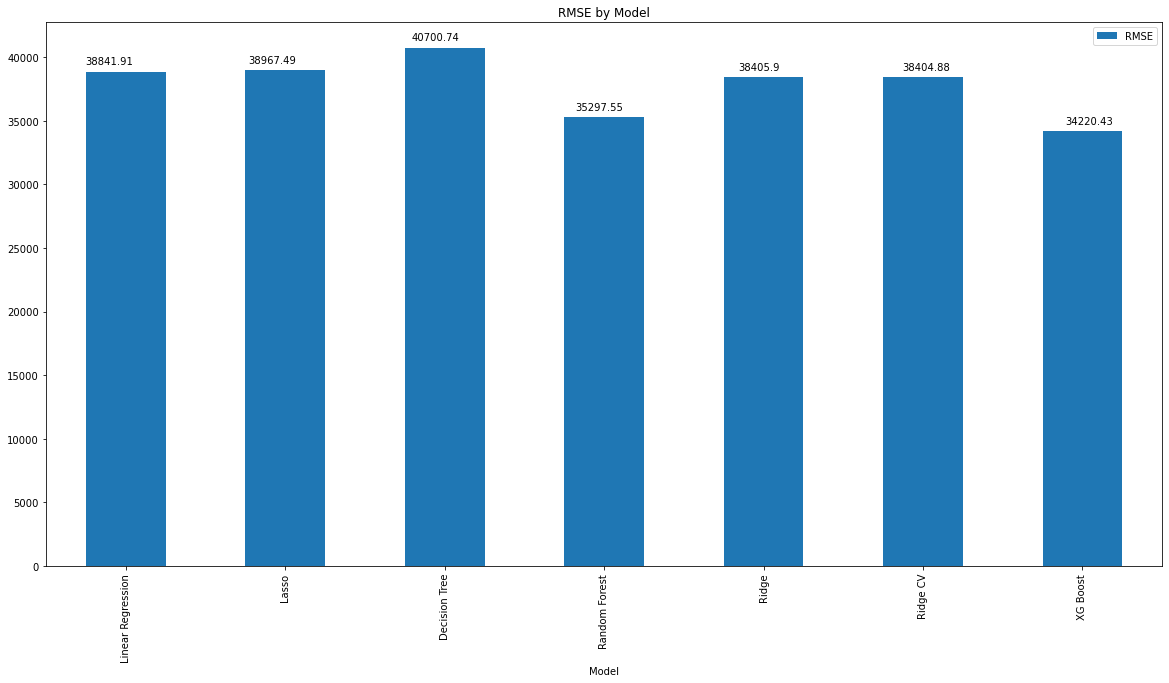

In [114]:
ax = df.plot(kind='bar',figsize=(20,10),title='RMSE by Model')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.015))